In [2]:
from bs4 import BeautifulSoup
import requests

### **Testing for single row of data**

In [7]:
url="https://www.timesjobs.com/candidate/job-search.html?searchType=personalizedSearch&from=submit&txtKeywords=python&txtLocation="
html_content=requests.get(url).text
soup=BeautifulSoup(html_content,'lxml')
job=soup.find('li', class_="clearfix job-bx wht-shd-bx")

In [14]:
comp_name=job.find('h3',class_="joblist-comp-name").text.replace(" ","")
print(comp_name)


PureTechCodexPrivateLimited




In [21]:
skills=job.find('span',class_="srp-skills").text
print(skills)


      
          rest  ,  python  ,  database  ,  django  ,  debugging  ,  mongodb
        
      


In [23]:
time=job.find('span',class_="sim-posted").span.text
print(time)

Posted few days ago


### **Scaling for all the records**

In [51]:
company_name=[]
job_skills=[]
experience=[]
job_role=[]
more_info_job=[]

for i in range(1,20):
  url="https://www.timesjobs.com/candidate/job-search.html?from=submit&actualTxtKeywords=python&searchBy=0&rdoOperator=OR&searchType=personalizedSearch&luceneResultSize=25&postWeek=60&txtKeywords=python&pDate=I&sequence=3&startPage="+str(i)
  html_content=requests.get(url).text
  soup=BeautifulSoup(html_content,'lxml')
  jobs=soup.find_all('li', class_="clearfix job-bx wht-shd-bx")
  for job in jobs:
    time=job.find('span',class_="sim-posted").span.text.strip()
    if 'few' in time: 
        comp_name=job.find('h3',class_="joblist-comp-name").text.strip()
        skills=job.find('span',class_="srp-skills").text.strip()
        exp=job.find('ul',class_="top-jd-dtl clearfix").li.text.strip()
        if 'card_travel' in exp:
          exp=exp.replace('card_travel',"")
        role=job.header.h2.a.text.strip()
        more_info=job.header.h2.a['href']
        company_name.append(comp_name),job_skills.append(skills),experience.append(exp),job_role.append(role),more_info_job.append(more_info)

###**Storing the data in excel file**

In [53]:
import pandas as pd

In [54]:
df=pd.DataFrame(data=zip(company_name,job_role,job_skills,experience,more_info_job),columns=['Company Name','Role',"Skills",'Experience','Job Description Link'])

In [55]:
df.head()

,Company Name,Role,Skills,Experience,Job Description Link
0,Doodleblue Innovations Pvt Ltd,Python Developer,"python , database , django , git , htm...",0 - 3 yrs,https://www.timesjobs.com/job-detail/python-de...
1,AxisTechnolabs,Python Developer,"python , css , user interaction , bootst...",0 - 1 yrs,https://www.timesjobs.com/job-detail/python-de...
2,pegasus knowledge solutions india pvt ltd.,Python Developer,"python , css , django , java , html ,...",0 - 3 yrs,https://www.timesjobs.com/job-detail/python-de...
3,Techasoft Pvt Ltd,Python Developer,"python , javascript , docker , django ,...",0 - 3 yrs,https://www.timesjobs.com/job-detail/python-de...
4,tarams software technologies,Python Developer,"python , rdbms , web based applications ,...",4 - 7 yrs,https://www.timesjobs.com/job-detail/python-de...


### **Knowing the data**

In [56]:
df.describe()

,Company Name,Role,Skills,Experience,Job Description Link
count,380,380,380,380,380
unique,16,4,20,11,20
top,APPLYCUP HIRING SOLUTIONS LLP,Python Developer,"python , database , django , git , htm...",0 - 3 yrs,https://www.timesjobs.com/job-detail/python-de...
freq,76,323,19,114,19


In [57]:
df.isna().sum()

Company Name            0
Role                    0
Skills                  0
Experience              0
Job Description Link    0
dtype: int64

In [59]:
df['Role'].unique()

array(['Python Developer', 'Python Engineer', 'Python developer',
       'Python Lead'], dtype=object)

In [64]:
df['Role']=df['Role'].apply(lambda x: x.lower())
df['Role'].value_counts()

python developer    342
python engineer      19
python lead          19
Name: Role, dtype: int64

### **Some visualization**

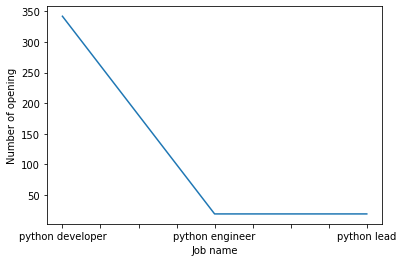

In [95]:
import matplotlib.pyplot as plt
# no. of opening based on roles
df['Role'].value_counts().plot()
plt.xlabel('Job name')
plt.ylabel('Number of opening')
plt.show()

In [68]:
#experience required
df['Experience']=df['Experience'].apply(lambda x:x.replace('yrs',""))
df['lower_experience']=df['Experience'].apply(lambda x: x.split('-')[0].strip())
df['upper_experience']=df['Experience'].apply(lambda x: x.split('-')[1].strip())
df.head()

,Company Name,Role,Skills,Experience,Job Description Link,lower_experience,upper_experience
0,Doodleblue Innovations Pvt Ltd,python developer,"python , database , django , git , htm...",0 - 3,https://www.timesjobs.com/job-detail/python-de...,0,3
1,AxisTechnolabs,python developer,"python , css , user interaction , bootst...",0 - 1,https://www.timesjobs.com/job-detail/python-de...,0,1
2,pegasus knowledge solutions india pvt ltd.,python developer,"python , css , django , java , html ,...",0 - 3,https://www.timesjobs.com/job-detail/python-de...,0,3
3,Techasoft Pvt Ltd,python developer,"python , javascript , docker , django ,...",0 - 3,https://www.timesjobs.com/job-detail/python-de...,0,3
4,tarams software technologies,python developer,"python , rdbms , web based applications ,...",4 - 7,https://www.timesjobs.com/job-detail/python-de...,4,7


In [73]:
df['lower_experience'].value_counts().reset_index().rename(columns={'index':'Experience','lower_experience':'Number of opening'})

,Experience,Number of opening
0,0,133
1,2,95
2,1,57
3,4,19
4,5,19
5,3,19
6,8,19
7,7,19


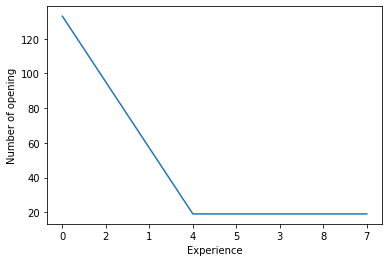

In [94]:
import matplotlib.pyplot as plt
df['lower_experience'].value_counts().plot()
plt.xlabel('Experience')
plt.ylabel('Number of opening')
plt.show()

In [ ]:
#getting most common skill
all_skills=[]
df['Skills'].apply(lambda x : all_skills.extend(x.split(',')))

In [87]:
c=[]
for skills in all_skills:
  c.append(skills.strip()) 

In [92]:
from collections import Counter
skills_demand=Counter(c)

In [93]:
skills_demand.most_common(10)

[('python', 380),
 ('django', 247),
 ('git', 152),
 ('javascript', 133),
 ('database', 114),
 ('team player', 95),
 ('html5', 76),
 ('html', 76),
 ('postgresql', 76),
 ('mysql', 76)]

### **Saving the data as excel file**

In [96]:
df.to_excel('job.xlsx')

In [97]:
df.head()

,Company Name,Role,Skills,Experience,Job Description Link,lower_experience,upper_experience
0,Doodleblue Innovations Pvt Ltd,python developer,"python , database , django , git , htm...",0 - 3,https://www.timesjobs.com/job-detail/python-de...,0,3
1,AxisTechnolabs,python developer,"python , css , user interaction , bootst...",0 - 1,https://www.timesjobs.com/job-detail/python-de...,0,1
2,pegasus knowledge solutions india pvt ltd.,python developer,"python , css , django , java , html ,...",0 - 3,https://www.timesjobs.com/job-detail/python-de...,0,3
3,Techasoft Pvt Ltd,python developer,"python , javascript , docker , django ,...",0 - 3,https://www.timesjobs.com/job-detail/python-de...,0,3
4,tarams software technologies,python developer,"python , rdbms , web based applications ,...",4 - 7,https://www.timesjobs.com/job-detail/python-de...,4,7
